In [95]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/maryland-mortgage-loans-fy-2011-2023/MD_Mortgage.csv


In [96]:
df = pd.read_csv('/kaggle/input/maryland-mortgage-loans-fy-2011-2023/MD_Mortgage.csv')

In [97]:
df.head(10)

,FY,County,Total Loan Amount,DPA Loan Amount,Mortgages Financed
0,2023,ALLEGANY,3457225.0,153887.0,28
1,2023,ANNE ARUNDEL,44732671.0,1788289.0,147
2,2023,BALTIMORE CITY,117811864.0,4995243.0,543
3,2023,BALTIMORE CO.,89167032.0,3666239.0,355
4,2023,CALVERT,13940151.0,537167.0,44
5,2023,CAROLINE,3262065.0,122749.0,14
6,2023,CARROLL,6072228.0,239407.0,21
7,2023,CECIL,8404246.0,307429.0,35
8,2023,CHARLES,55113363.0,2196752.0,155
9,2023,DORCHESTER,4630469.0,152122.0,22


In [98]:
df.tail(10)

,FY,County,Total Loan Amount,DPA Loan Amount,Mortgages Financed
283,2011,HOWARD,5767531.0,135500.0,24
284,2011,KENT,155440.0,5000.0,1
285,2011,MONTGOMERY,4788529.0,118000.0,23
286,2011,PRINCE GEORGE'S,53000462.0,1560850.0,273
287,2011,QUEEN ANNE'S,756593.0,16000.0,4
288,2011,SAINT MARY'S,12401724.0,284000.0,59
289,2011,SOMERSET,400604.0,15500.0,4
290,2011,TALBOT,495833.0,15000.0,3
291,2011,WICOMICO,2225963.0,84000.0,18
292,2011,WORCESTER,933629.0,37000.0,8


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   FY                  293 non-null    int64  
 1   County              293 non-null    object 
 2   Total Loan Amount   293 non-null    float64
 3   DPA Loan Amount     292 non-null    float64
 4   Mortgages Financed  293 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 11.6+ KB


In [100]:
df.isnull().sum()

FY                    0
County                0
Total Loan Amount     0
DPA Loan Amount       1
Mortgages Financed    0
dtype: int64

In [101]:
df = df.dropna()

In [102]:
df.describe()

,FY,Total Loan Amount,DPA Loan Amount,Mortgages Financed
count,292.000000,2.920000e+02,2.920000e+02,292.000000
mean,2017.311644,2.431048e+07,6.281753e+05,109.027397
std,3.662122,3.862046e+07,1.030487e+06,157.602329
min,2011.000000,6.863300e+04,2.500000e+03,1.000000
25%,2014.000000,2.172304e+06,5.000000e+04,13.000000
50%,2017.000000,8.792378e+06,1.732500e+05,40.500000
75%,2020.000000,2.708901e+07,7.042500e+05,135.250000
max,2023.000000,2.567965e+08,6.163092e+06,855.000000


In [103]:
df.corr

<bound method DataFrame.corr of        FY          County  Total Loan Amount  DPA Loan Amount  \
0    2023        ALLEGANY          3457225.0         153887.0   
1    2023    ANNE ARUNDEL         44732671.0        1788289.0   
2    2023  BALTIMORE CITY        117811864.0        4995243.0   
3    2023   BALTIMORE CO.         89167032.0        3666239.0   
4    2023         CALVERT         13940151.0         537167.0   
..    ...             ...                ...              ...   
288  2011    SAINT MARY'S         12401724.0         284000.0   
289  2011        SOMERSET           400604.0          15500.0   
290  2011          TALBOT           495833.0          15000.0   
291  2011        WICOMICO          2225963.0          84000.0   
292  2011       WORCESTER           933629.0          37000.0   

     Mortgages Financed  
0                    28  
1                   147  
2                   543  
3                   355  
4                    44  
..                  ...  
288  

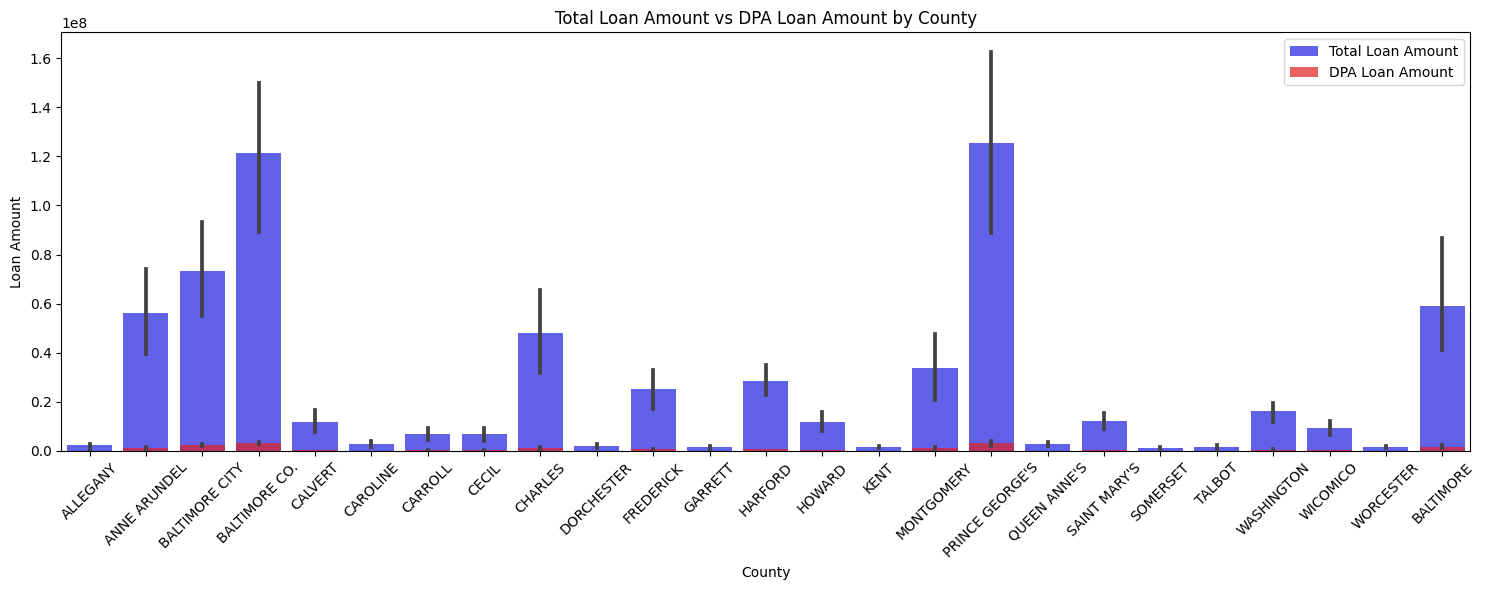

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))
sns.barplot(x='County', y='Total Loan Amount', data=df, color='blue', alpha=0.7, label='Total Loan Amount')
sns.barplot(x='County', y='DPA Loan Amount', data=df, color='red', alpha=0.7, label='DPA Loan Amount')
plt.xlabel('County')
plt.ylabel('Loan Amount')
plt.title('Total Loan Amount vs DPA Loan Amount by County')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


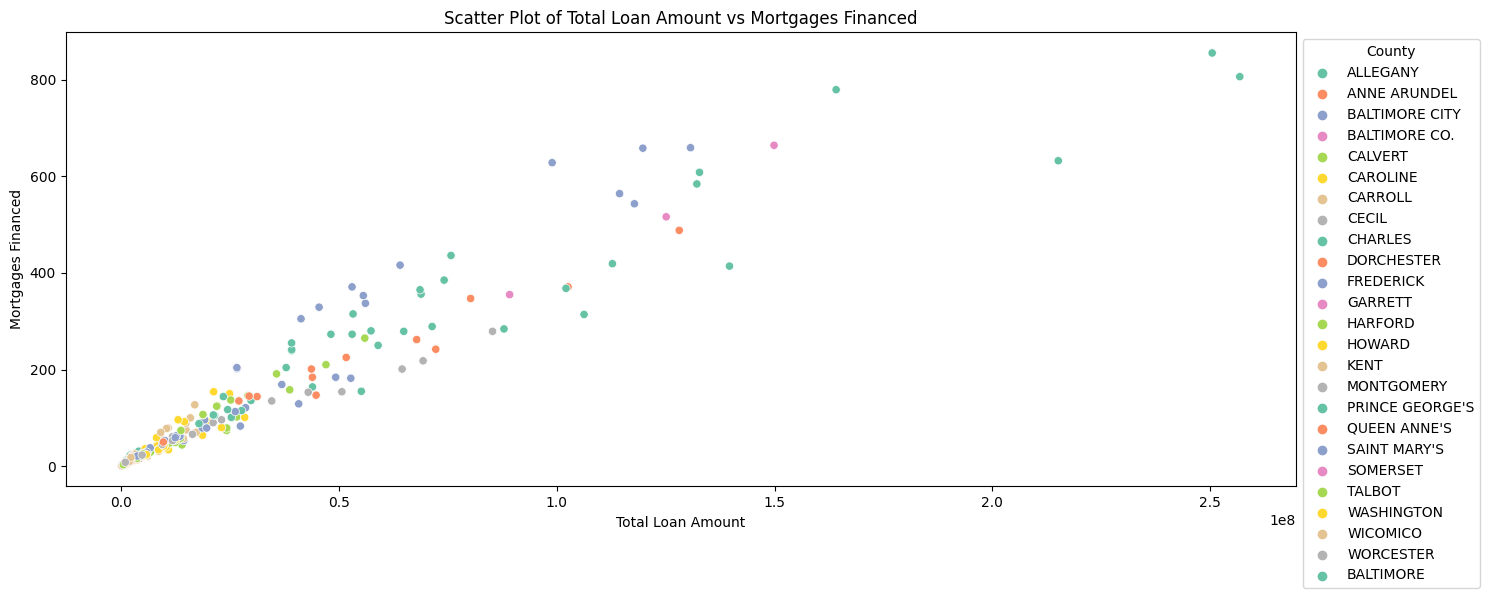

In [105]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='Total Loan Amount', y='Mortgages Financed', data=df, hue='County', palette='Set2')
plt.title('Scatter Plot of Total Loan Amount vs Mortgages Financed')
plt.xlabel('Total Loan Amount')
plt.ylabel('Mortgages Financed')
plt.legend(title='County', loc='upper left', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


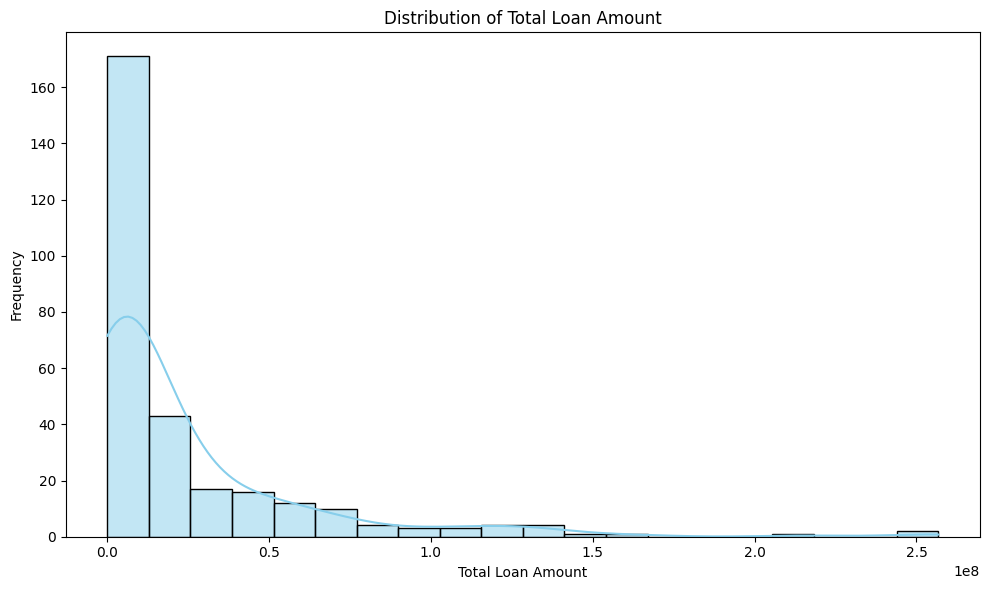

In [106]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Loan Amount'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Total Loan Amount')
plt.xlabel('Total Loan Amount')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

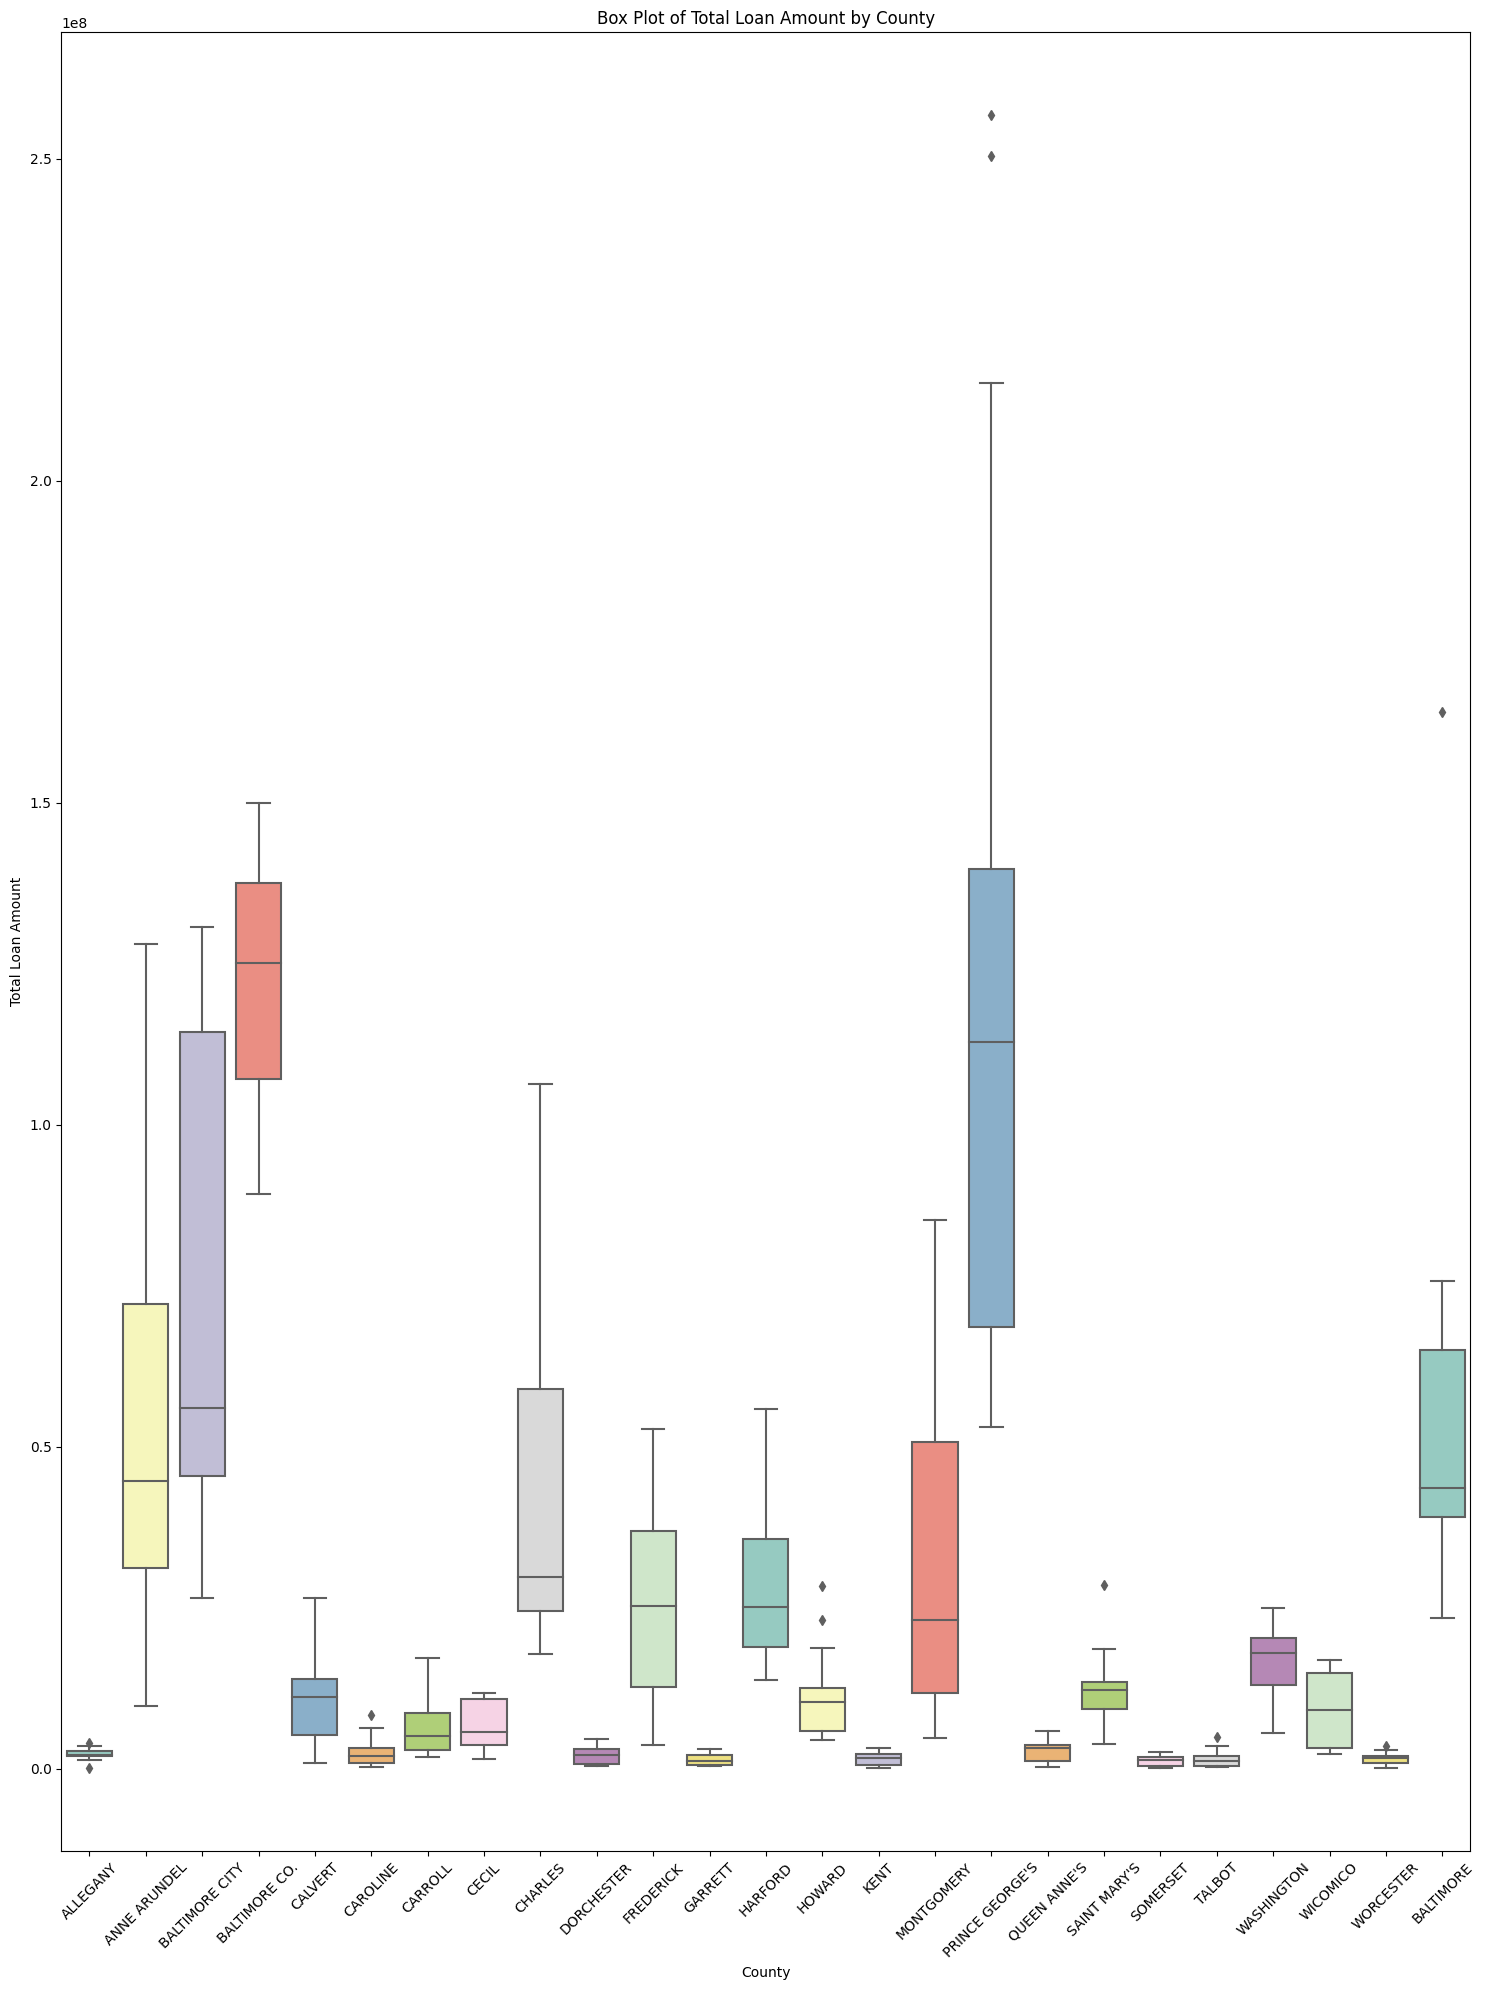

In [107]:
plt.figure(figsize=(15, 20))
sns.boxplot(x='County', y='Total Loan Amount', data=df, palette='Set3')
plt.title('Box Plot of Total Loan Amount by County')
plt.xlabel('County')
plt.ylabel('Total Loan Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

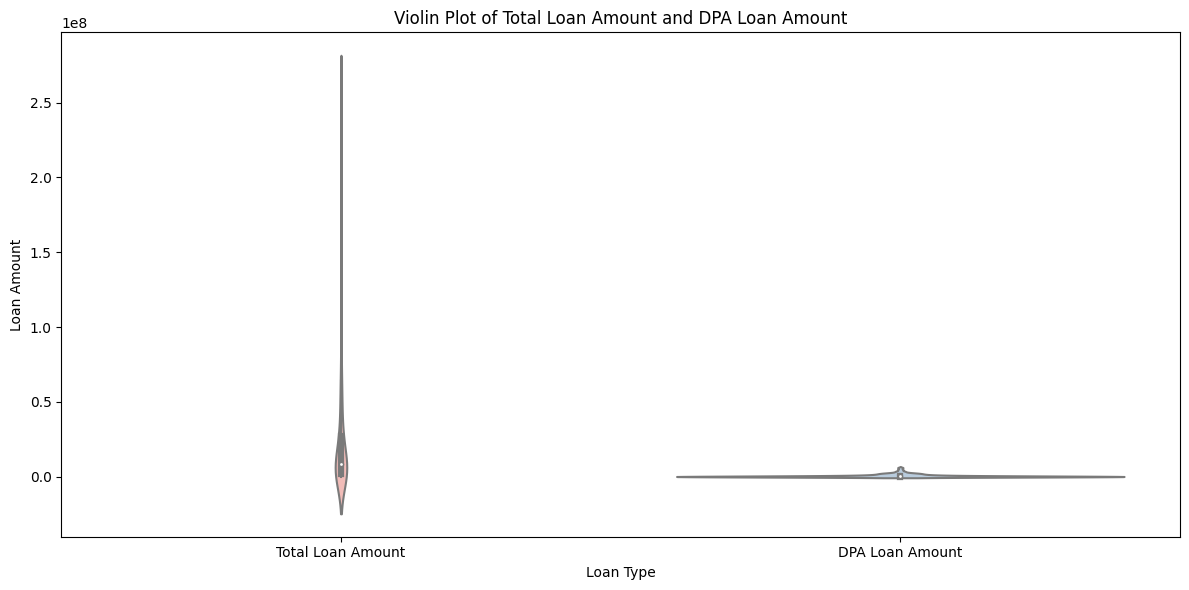

In [108]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='variable', y='value', data=pd.melt(df[['Total Loan Amount', 'DPA Loan Amount']]), palette='Pastel1')
plt.title('Violin Plot of Total Loan Amount and DPA Loan Amount')
plt.xlabel('Loan Type')
plt.ylabel('Loan Amount')
plt.xticks([0, 1], ['Total Loan Amount', 'DPA Loan Amount'])
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


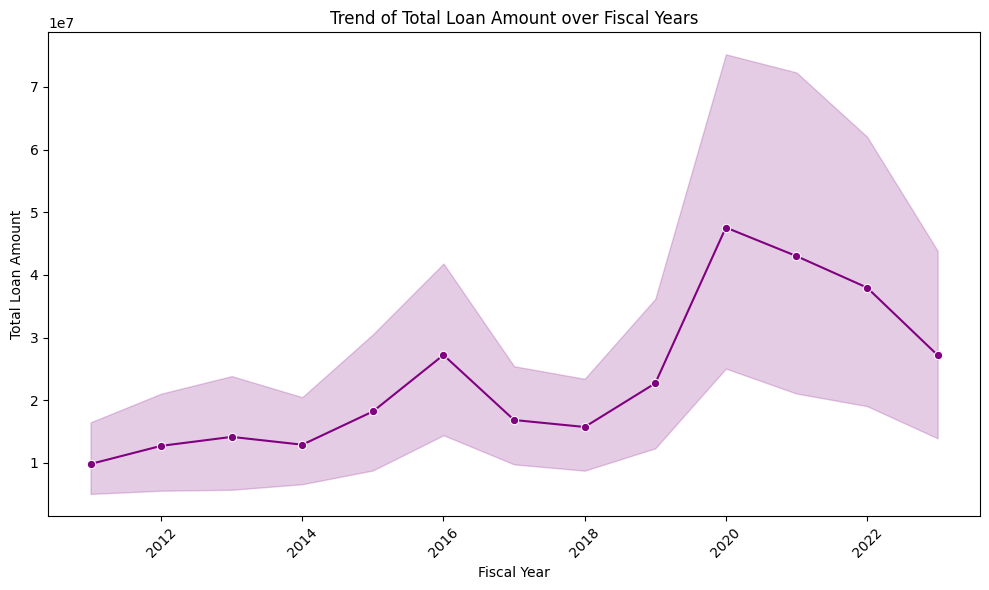

In [109]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='FY', y='Total Loan Amount', data=df, marker='o', color='purple')
plt.title('Trend of Total Loan Amount over Fiscal Years')
plt.xlabel('Fiscal Year')
plt.ylabel('Total Loan Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


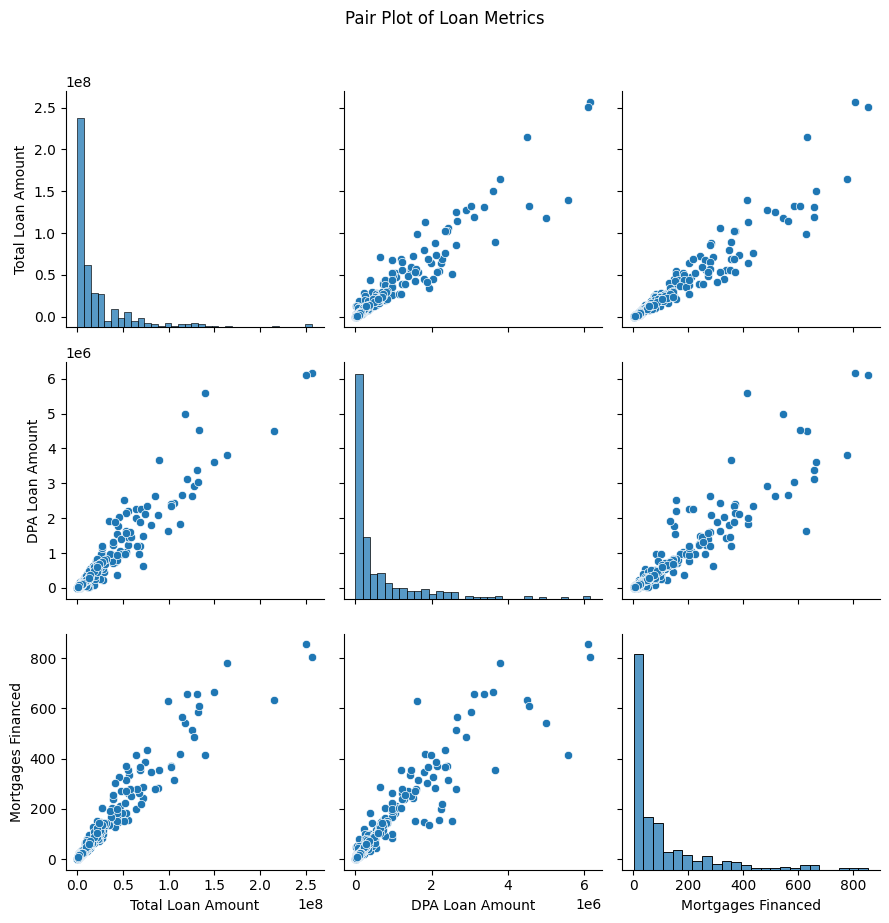

In [110]:
sns.pairplot(df[['Total Loan Amount', 'DPA Loan Amount', 'Mortgages Financed']], height=3)
plt.suptitle('Pair Plot of Loan Metrics', y=1.02)
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

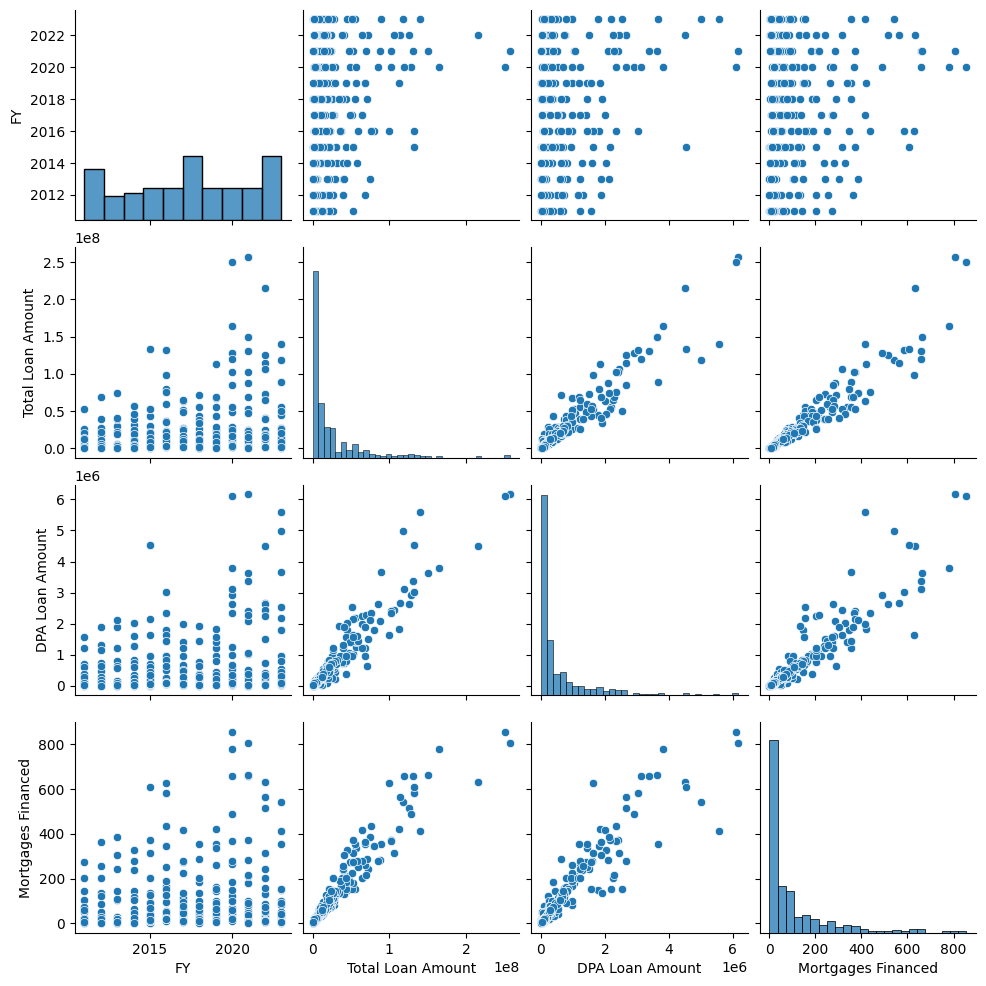

In [111]:
sns.pairplot(df)

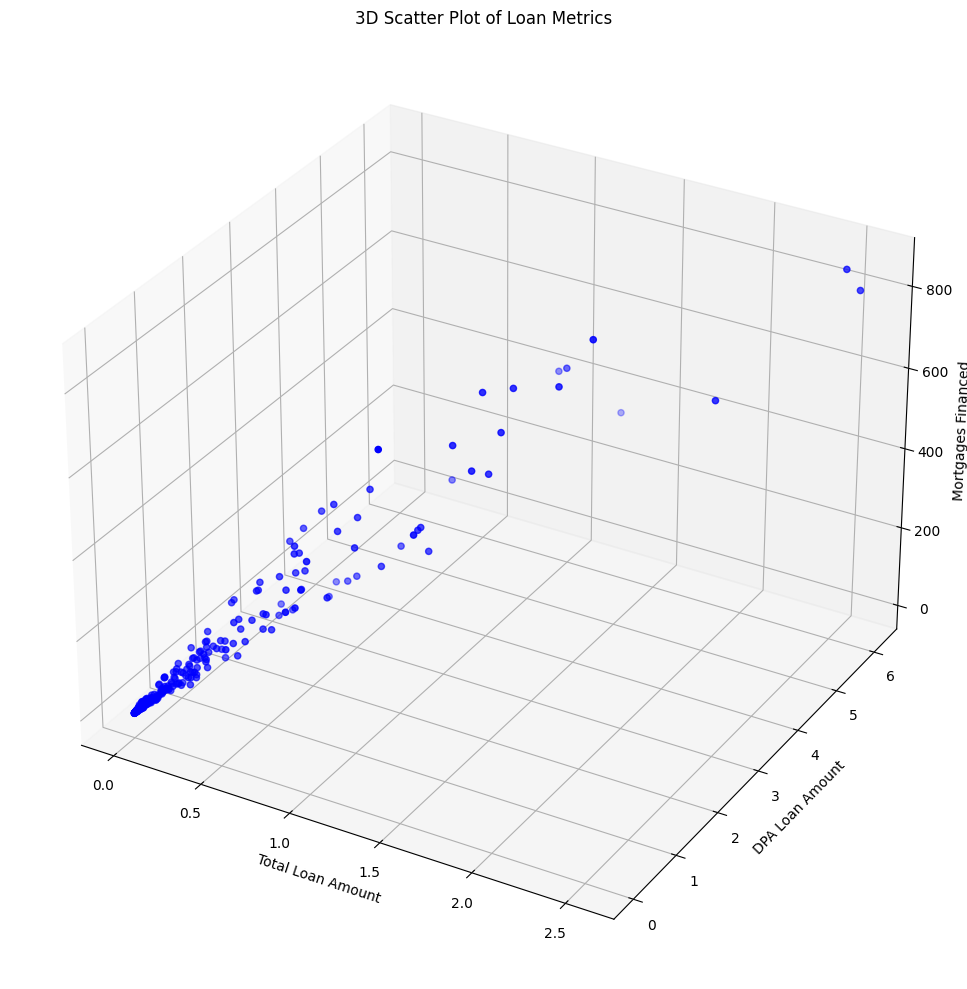

In [112]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

x = df['Total Loan Amount']
y = df['DPA Loan Amount']
z = df['Mortgages Financed']

ax.scatter(x, y, z, c='blue', marker='o')

ax.set_xlabel('Total Loan Amount')
ax.set_ylabel('DPA Loan Amount')
ax.set_zlabel('Mortgages Financed')

ax.set_title('3D Scatter Plot of Loan Metrics')
plt.tight_layout()
plt.show()

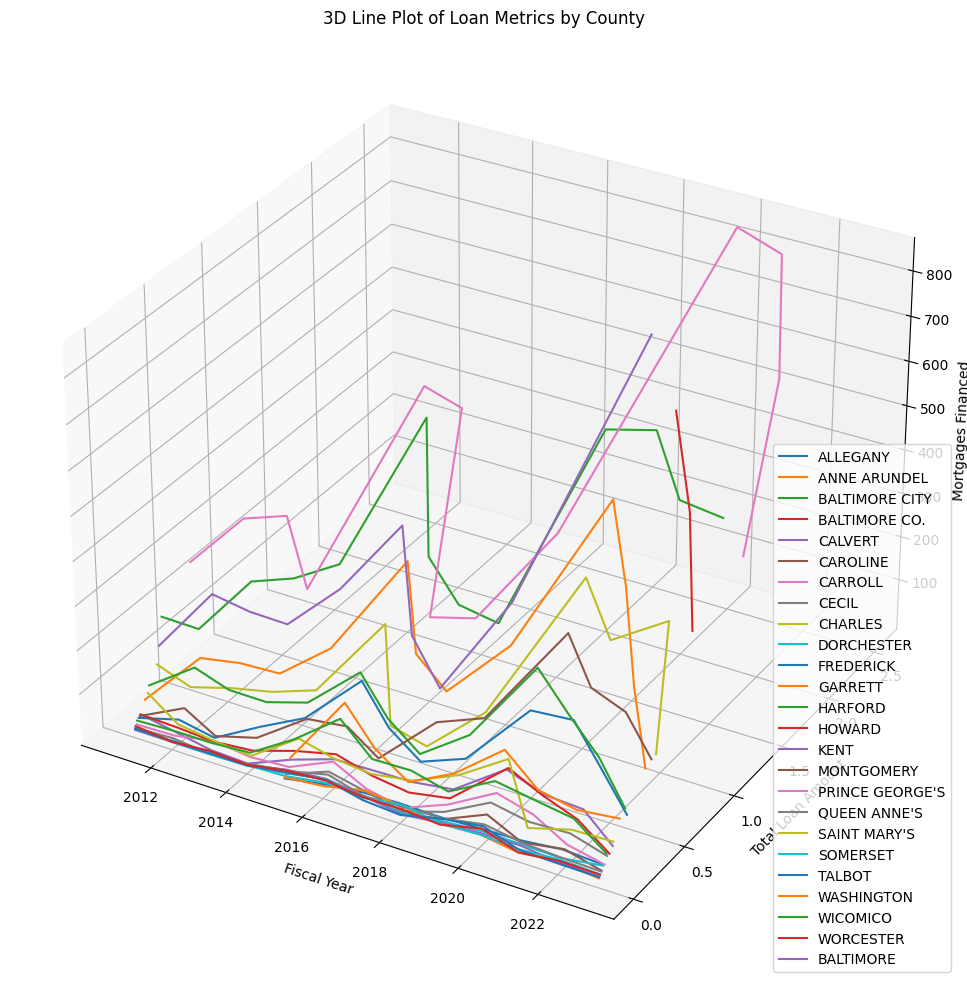

In [113]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

for county in df['County'].unique():
    county_data = df[df['County'] == county]
    ax.plot(county_data['FY'], county_data['Total Loan Amount'], county_data['Mortgages Financed'], label=county)

ax.set_xlabel('Fiscal Year')
ax.set_ylabel('Total Loan Amount')
ax.set_zlabel('Mortgages Financed')

ax.set_title('3D Line Plot of Loan Metrics by County')
ax.legend()
plt.tight_layout()
plt.show()

In [114]:
from sklearn.model_selection import train_test_split

# Assuming 'Mortgages Financed' is the target variable
X = df[['FY', 'Total Loan Amount', 'DPA Loan Amount']]
y = df['Mortgages Financed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 1637.5640223690482
R-squared (R2): 0.882249450999706


In [117]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

Mean Absolute Error (MAE): 23.38934186855079


In [118]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape y for TensorFlow compatibility
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

In [119]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(32, activation='relu', input_dim=X_train_scaled.shape[1]),
    Dense(16, activation='relu'),
    Dense(1)  # Output layer, assuming regression
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))

2024-07-02 12:29:52.010425: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-02 12:29:52.010659: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-02 12:29:52.164694: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 39342.4688 - val_loss: 21459.5527
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 43944.0039 - val_loss: 21436.6270
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 34942.1523 - val_loss: 21412.9453
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 45342.9766 - val_loss: 21386.2832
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 47238.7070 - val_loss: 21357.1699
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 35705.6055 - val_loss: 21324.8105
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 35815.5898 - val_loss: 21287.5020
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 32798.3125 - val_loss: 21241.9746
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 44756.4766 - val_loss: 21188.3730
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 38799.0312 - val_loss: 21119.7734
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 43940.7773 - val_loss: 21030.2656
Epoch 1

In [120]:
loss = model.evaluate(X_test_scaled, y_test)
print(f'Loss (MSE) on test data: {loss}')


y_pred_nn = model.predict(X_test_scaled)
r2_nn = r2_score(y_test, y_pred_nn)
print(f'R-squared (R2) on test data: {r2_nn}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5160.5923 
Loss (MSE) on test data: 4396.36279296875
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
R-squared (R2) on test data: 0.6838755016023478


In [122]:
threshold = df['Mortgages Financed'].median()
df['Mortgages_Class'] = df['Mortgages Financed'].apply(lambda x: 'Low' if x <= threshold else 'High')

# Features and target
X_cls = df[['FY', 'Total Loan Amount', 'DPA Loan Amount']]
y_cls = df['Mortgages_Class']

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_cls = label_encoder.fit_transform(y_cls)

In [123]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

# Initialize and train the model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_cls, y_train_cls)

# Predict on the test set
y_pred_cls = rf_classifier.predict(X_test_cls)

# Calculate classification metrics
accuracy = accuracy_score(y_test_cls, y_pred_cls)
precision = precision_score(y_test_cls, y_pred_cls)
recall = recall_score(y_test_cls, y_pred_cls)
f1 = f1_score(y_test_cls, y_pred_cls)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

Accuracy: 0.9491525423728814
Precision: 0.9310344827586207
Recall: 0.9642857142857143
F1-score: 0.9473684210526316


In [124]:
from sklearn.model_selection import cross_val_score, KFold

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_accuracy = cross_val_score(rf_classifier, X_cls, y_cls, cv=kf, scoring='accuracy')
cv_precision = cross_val_score(rf_classifier, X_cls, y_cls, cv=kf, scoring='precision')
cv_recall = cross_val_score(rf_classifier, X_cls, y_cls, cv=kf, scoring='recall')
cv_f1 = cross_val_score(rf_classifier, X_cls, y_cls, cv=kf, scoring='f1')

# Print average metrics from cross-validation
print(f'Cross-Validation Accuracy: {cv_accuracy.mean()}')
print(f'Cross-Validation Precision: {cv_precision.mean()}')
print(f'Cross-Validation Recall: {cv_recall.mean()}')
print(f'Cross-Validation F1-score: {cv_f1.mean()}')

Cross-Validation Accuracy: 0.9725891291642315
Cross-Validation Precision: 0.9797701149425289
Cross-Validation Recall: 0.9683333333333334
Cross-Validation F1-score: 0.9728715125042295


In [125]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Initialize different models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='linear'),
    'KNN': KNeighborsClassifier()
}

# Evaluate each model using cross-validation
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_cls, y_cls, cv=kf, scoring='accuracy')
    print(f'{model_name} - Cross-Validation Accuracy: {cv_scores.mean()}')

Random Forest - Cross-Validation Accuracy: 0.9725891291642315
SVM - Cross-Validation Accuracy: 0.9691992986557569
KNN - Cross-Validation Accuracy: 0.9658094681472823


In [126]:
df_encoded = pd.get_dummies(df, columns=['County'], drop_first=True)

In [127]:
scaler = StandardScaler()
df_scaled = df.copy()  # Make a copy of DataFrame
df_scaled[['FY', 'Total Loan Amount', 'DPA Loan Amount']] = scaler.fit_transform(df[['FY', 'Total Loan Amount', 'DPA Loan Amount']])

In [128]:
df['Interaction_Feature'] = df['FY'] * df['Total Loan Amount']

In [129]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Perform Grid Search
grid_search.fit(X_cls, y_cls)

# Print best parameters and best score
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best cross-validation score: {grid_search.best_score_}')

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validation score: 0.9727644652250145


In [133]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Assuming we have X_cls and y_cls from previous examples

# Initialize Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Fit the model
gb_classifier.fit(X_train_cls, y_train_cls)

# Predict on the test set
y_pred_gb = gb_classifier.predict(X_test_cls)

# Calculate accuracy
accuracy_gb = accuracy_score(y_test_cls, y_pred_gb)
print(f'Gradient Boosting Classifier Accuracy: {accuracy_gb}')

Gradient Boosting Classifier Accuracy: 0.9322033898305084


In [135]:
from sklearn.feature_selection import RFE
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize RFE
rfe = RFE(estimator=rf_classifier, n_features_to_select=3, step=1)

# Fit RFE
rfe.fit(X_cls, y_cls)

# Get selected features
selected_features = X_cls.columns[rfe.support_]
print(f'Selected Features by RFE: {selected_features}')

Selected Features by RFE: Index(['FY', 'Total Loan Amount', 'DPA Loan Amount'], dtype='object')


In [136]:
from sklearn.model_selection import cross_val_score, KFold

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation with Gradient Boosting Classifier
cv_scores_gb = cross_val_score(gb_classifier, X_cls, y_cls, cv=kf, scoring='accuracy')

# Print average cross-validation accuracy
print(f'Cross-Validation Accuracy (Gradient Boosting): {cv_scores_gb.mean()}')

Cross-Validation Accuracy (Gradient Boosting): 0.9624196376388078


In [137]:
train_df = df[df['FY'] < 2023]
val_df = df[df['FY'] >= 2023]

# Prepare data for training and validation
X_train_ts = train_df[['Total Loan Amount', 'DPA Loan Amount']]
y_train_ts = train_df['Mortgages_Class']

X_val_ts = val_df[['Total Loan Amount', 'DPA Loan Amount']]
y_val_ts = val_df['Mortgages_Class']

# Initialize and train Gradient Boosting Classifier
gb_classifier_ts = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_classifier_ts.fit(X_train_ts, y_train_ts)

# Predict on validation set
y_pred_val = gb_classifier_ts.predict(X_val_ts)

# Evaluate accuracy on validation set
accuracy_val = accuracy_score(y_val_ts, y_pred_val)
print(f'Validation Accuracy (Gradient Boosting): {accuracy_val}')

Validation Accuracy (Gradient Boosting): 0.9166666666666666
